<a href="https://colab.research.google.com/github/mhtasnia/DS422/blob/main/DS422_lab_evo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Social_Media_Impact_OnStudents.csv')

In [4]:
df.head()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
0,25–34,Female,Less than 1 hour,Rarely,Slightly,Sometimes,Sometimes,Moderately,Moderately,Sometimes,Often,Sometimes,Often,Sometimes,Often,Slightly,Instagram,Often,Slightly
1,18–24,Female,1–3 hours,Sometimes,Moderately,Sometimes,Often,Moderately,Moderately,Sometimes,Often,Often,Sometimes,Often,Often,Moderately,Facebook,Sometimes,Moderately
2,18–24,Male,Less than 1 hour,Always,Significantly,Always,Often,Significantly,Moderately,Often,Always,Always,Often,Often,Always,Slightly,Facebook,Always,Significantly
3,18–24,Female,1–3 hours,Sometimes,Slightly,Sometimes,Often,Slightly,Slightly,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Slightly,TikTok,Sometimes,Slightly
4,18–24,Female,More than 3 hours,Often,Moderately,Often,Often,Significantly,Moderately,Sometimes,Often,Often,Always,Often,Often,Significantly,YouTube,Sometimes,Moderately


In [5]:
df.shape

(1501, 19)

In [6]:
df.isnull().sum()

,0
AgeGroup,0
Gender,0
SocialMediaHours,0
UsageDuringStudy,0
FocusReduction,0
Procrastination,0
CheckingDuringStudy,0
CourseworkDistraction,0
TimeManagementDifficulty,0
NotificationDisruption,0


<Axes: >

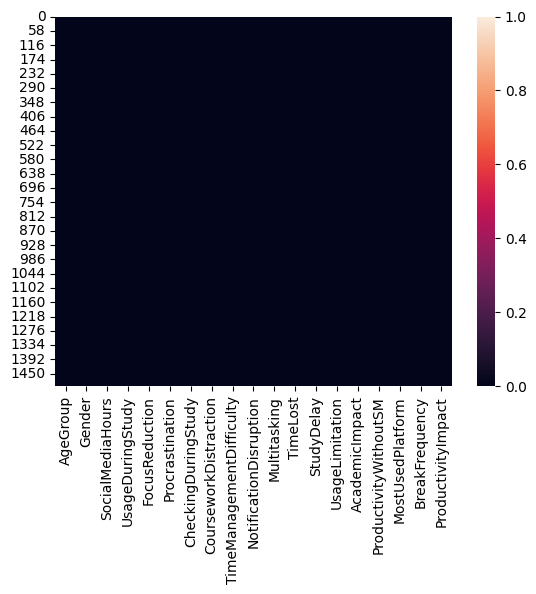

In [7]:
sns.heatmap(df.isnull())

In [43]:
modeUsageLimitation = df['UsageLimitation'].mode()[0]
df['UsageLimitation']=df['UsageLimitation'].fillna(modeUsageLimitation)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   AgeGroup                  1501 non-null   int64
 1   Gender                    1501 non-null   int64
 2   SocialMediaHours          1501 non-null   int64
 3   UsageDuringStudy          1501 non-null   int64
 4   FocusReduction            1501 non-null   int64
 5   Procrastination           1501 non-null   int64
 6   CheckingDuringStudy       1501 non-null   int64
 7   CourseworkDistraction     1501 non-null   int64
 8   TimeManagementDifficulty  1501 non-null   int64
 9   NotificationDisruption    1501 non-null   int64
 10  Multitasking              1501 non-null   int64
 11  TimeLost                  1501 non-null   int64
 12  StudyDelay                1501 non-null   int64
 13  UsageLimitation           1501 non-null   int64
 14  AcademicImpact            1501 non-null 

In [45]:
df.columns

Index(['AgeGroup', 'Gender', 'SocialMediaHours', 'UsageDuringStudy',
       'FocusReduction', 'Procrastination', 'CheckingDuringStudy',
       'CourseworkDistraction', 'TimeManagementDifficulty',
       'NotificationDisruption', 'Multitasking', 'TimeLost', 'StudyDelay',
       'UsageLimitation', 'AcademicImpact', 'ProductivityWithoutSM',
       'MostUsedPlatform', 'BreakFrequency', 'ProductivityImpact'],
      dtype='object')

In [46]:

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

categorical_columns = [
    'AgeGroup', 'Gender', 'SocialMediaHours', 'UsageDuringStudy',
       'FocusReduction', 'Procrastination', 'CheckingDuringStudy',
       'CourseworkDistraction', 'TimeManagementDifficulty',
       'NotificationDisruption', 'Multitasking', 'TimeLost', 'StudyDelay',
       'UsageLimitation', 'AcademicImpact', 'ProductivityWithoutSM',
       'MostUsedPlatform', 'BreakFrequency', 'ProductivityImpact'
]

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
0,1,0,1,2,3,3,3,0,0,3,1,3,1,4,1,3,1,1,3
1,0,0,0,3,0,3,1,0,0,3,1,1,3,1,1,0,0,3,0
2,0,1,1,0,2,0,1,2,0,1,0,0,1,1,0,3,0,0,2
3,0,0,0,3,3,3,1,3,3,3,3,3,3,4,3,3,5,3,3
4,0,0,2,1,0,1,1,2,0,3,1,1,0,1,1,2,7,3,0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1501 entries, 0 to 1500
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   AgeGroup                  1501 non-null   int64
 1   Gender                    1501 non-null   int64
 2   SocialMediaHours          1501 non-null   int64
 3   UsageDuringStudy          1501 non-null   int64
 4   FocusReduction            1501 non-null   int64
 5   Procrastination           1501 non-null   int64
 6   CheckingDuringStudy       1501 non-null   int64
 7   CourseworkDistraction     1501 non-null   int64
 8   TimeManagementDifficulty  1501 non-null   int64
 9   NotificationDisruption    1501 non-null   int64
 10  Multitasking              1501 non-null   int64
 11  TimeLost                  1501 non-null   int64
 12  StudyDelay                1501 non-null   int64
 13  UsageLimitation           1501 non-null   int64
 14  AcademicImpact            1501 non-null 

In [48]:
df.head()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
0,1,0,1,2,3,3,3,0,0,3,1,3,1,4,1,3,1,1,3
1,0,0,0,3,0,3,1,0,0,3,1,1,3,1,1,0,0,3,0
2,0,1,1,0,2,0,1,2,0,1,0,0,1,1,0,3,0,0,2
3,0,0,0,3,3,3,1,3,3,3,3,3,3,4,3,3,5,3,3
4,0,0,2,1,0,1,1,2,0,3,1,1,0,1,1,2,7,3,0


In [49]:
df.describe()

,AgeGroup,Gender,SocialMediaHours,UsageDuringStudy,FocusReduction,Procrastination,CheckingDuringStudy,CourseworkDistraction,TimeManagementDifficulty,NotificationDisruption,Multitasking,TimeLost,StudyDelay,UsageLimitation,AcademicImpact,ProductivityWithoutSM,MostUsedPlatform,BreakFrequency,ProductivityImpact
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000
mean,0.522318,0.611592,1.189873,1.632911,1.582945,1.640240,1.677548,1.591606,1.575616,1.589607,1.692205,1.600266,1.552298,1.896736,1.697535,1.554963,2.184544,1.639574,1.592272
std,0.739596,0.544401,0.908070,1.147965,1.208559,1.143599,1.153526,1.258214,1.227645,1.134078,1.135429,1.151278,1.165374,1.596871,1.115551,1.169819,2.724932,1.148915,1.225961
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
75%,1.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,2.000000,5.000000,3.000000,3.000000
max,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,7.000000,3.000000,3.000000


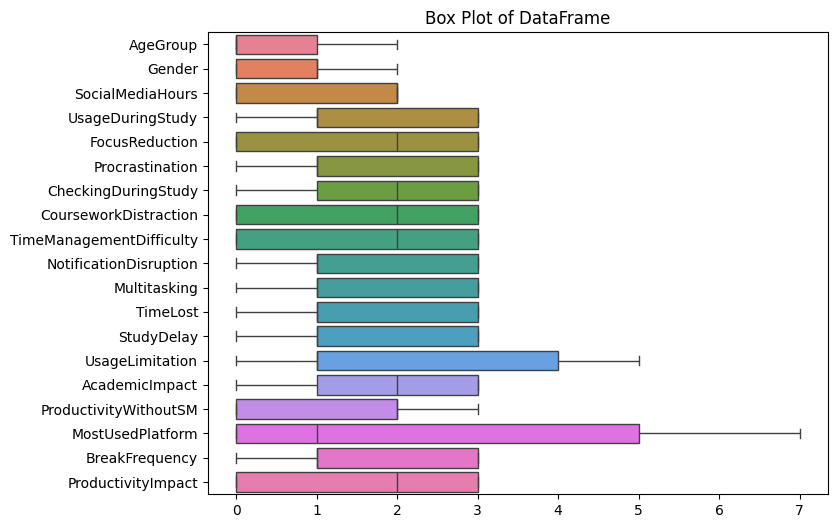

In [52]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, orient='h')
plt.title("Box Plot of DataFrame")
plt.show()

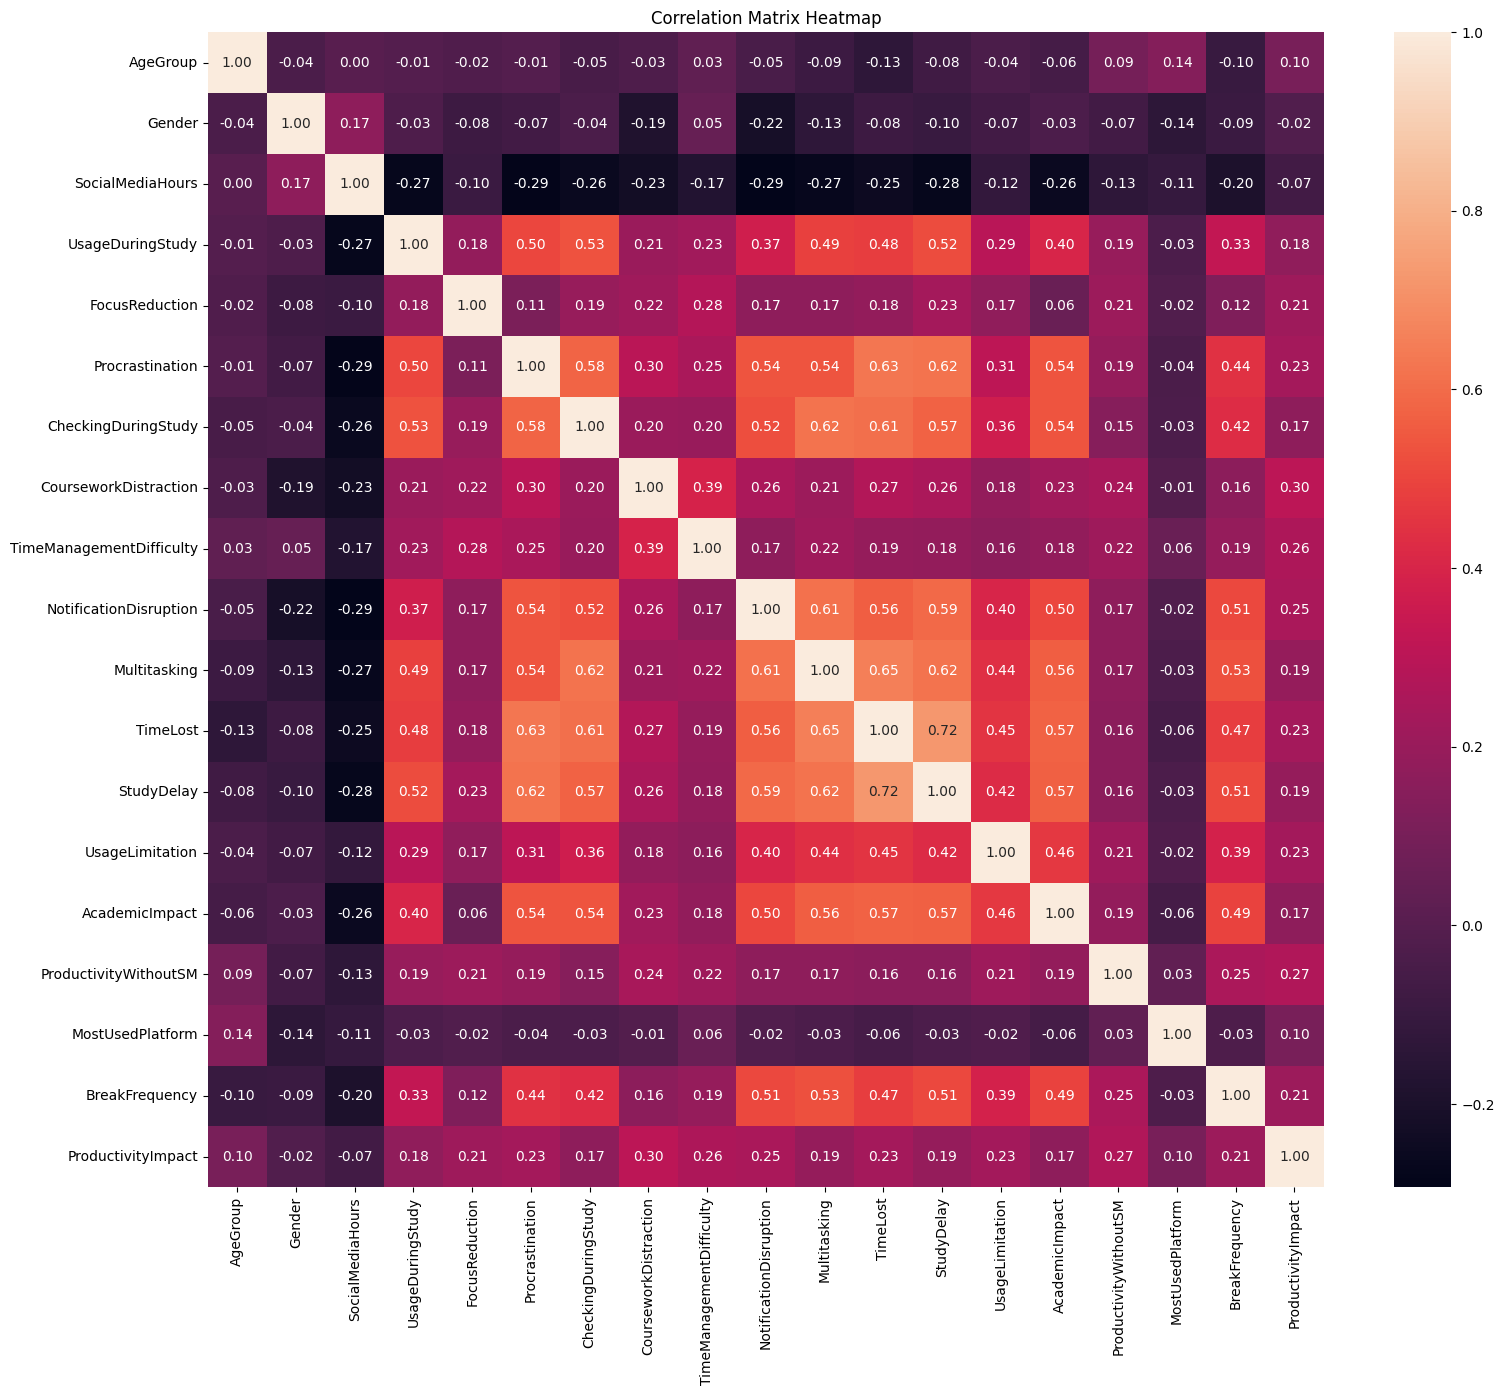

In [53]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(), annot=True,fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()


In [115]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

X_numeric = df[numeric_columns].drop(columns=['ProductivityImpact'])
y = df['ProductivityImpact']

selector = SelectKBest(score_func=chi2, k=15)

X_numeric_new = selector.fit_transform(X_numeric, y)

selected_indices = selector.get_support(indices=True)

selected_features = X_numeric.columns[selected_indices]
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['SocialMediaHours', 'UsageDuringStudy', 'FocusReduction',
       'Procrastination', 'CheckingDuringStudy', 'CourseworkDistraction',
       'TimeManagementDifficulty', 'NotificationDisruption', 'Multitasking',
       'TimeLost', 'StudyDelay', 'UsageLimitation', 'AcademicImpact',
       'ProductivityWithoutSM', 'BreakFrequency'],
      dtype='object')


In [116]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X_numeric_new, y, test_size=0.2, random_state=42)

print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)


Training data shape (X_train, y_train): (1200, 15) (1200,)
Testing data shape (X_test, y_test): (301, 15) (301,)


# **Naive Bayes Model**

In [117]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5780730897009967


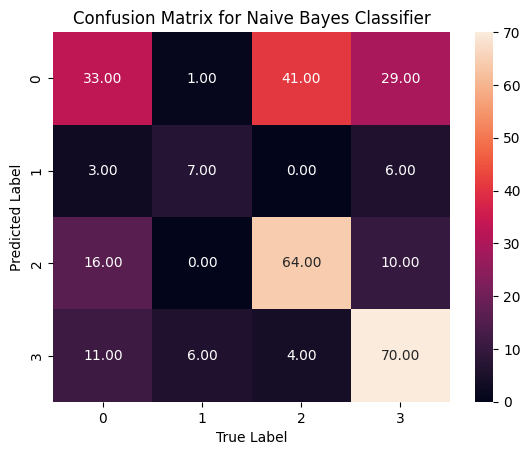

In [118]:
from sklearn.metrics import confusion_matrix
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Naive Bayes Classifier")
plt.show()

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      0.32      0.40       104
           1       0.50      0.44      0.47        16
           2       0.59      0.71      0.64        90
           3       0.61      0.77      0.68        91

    accuracy                           0.58       301
   macro avg       0.55      0.56      0.55       301
weighted avg       0.57      0.58      0.56       301



# **Decision Tree**

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))


Accuracy: 0.9568106312292359
              precision    recall  f1-score   support

           0       0.99      0.90      0.94       104
           1       0.89      1.00      0.94        16
           2       0.99      0.99      0.99        90
           3       0.91      0.98      0.94        91

    accuracy                           0.96       301
   macro avg       0.94      0.97      0.95       301
weighted avg       0.96      0.96      0.96       301



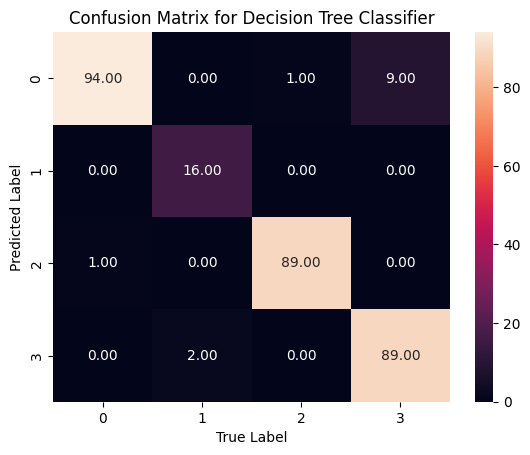

In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".2f")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

# **KNN**

In [100]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8770764119601329


In [101]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87       104
           1       0.58      0.94      0.71        16
           2       0.96      0.86      0.91        90
           3       0.92      0.88      0.90        91

    accuracy                           0.88       301
   macro avg       0.83      0.89      0.85       301
weighted avg       0.89      0.88      0.88       301



# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = np.sum(y_pred == y_test) / len(y_test)
print("Accuracy:", accuracy)

Accuracy: 0.574750830564784


In [103]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.49      0.43      0.46       104
           1       0.00      0.00      0.00        16
           2       0.60      0.63      0.62        90
           3       0.63      0.78      0.70        91

    accuracy                           0.57       301
   macro avg       0.43      0.46      0.44       301
weighted avg       0.54      0.57      0.55       301



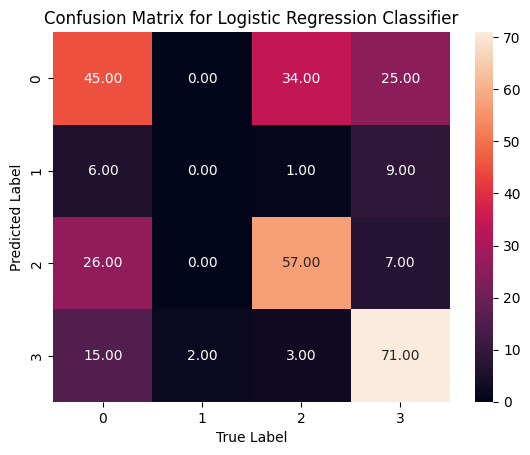

In [104]:
cm = np.array(pd.crosstab(y_test, y_pred))
sns.heatmap(cm, annot=True, fmt=".2f")

plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.title("Confusion Matrix for Logistic Regression Classifier")
plt.show()

# **Linear Regression**

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R^2:", r2)

MAE: 1.0055583711458052
MSE: 1.3571592247532396
R^2: 0.12004248842895593
